In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/predictive_maintenance.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [ ]:
df.columns[:2]

Index(['UDI', 'Product ID'], dtype='object')

In [ ]:
df.drop(df.columns[:2] , axis = 1, inplace = True)

In [ ]:
df.shape

(10000, 8)

In [ ]:
df['Type'].value_counts()

,count
Type,
L,6000
M,2997
H,1003


In [ ]:
df['Target'].value_counts()

,count
Target,
0,9661
1,339


In [ ]:
df['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9652
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
Random Failures,18


In [ ]:
data1 = df[df.Target == 1]
data1['Failure Type'].value_counts()

,count
Failure Type,
Heat Dissipation Failure,112
Power Failure,95
Overstrain Failure,78
Tool Wear Failure,45
No Failure,9


In [ ]:
index1 = data1[data1['Failure Type'] == 'No Failure'].index
df.drop(index1 , axis =0 , inplace = True )

In [ ]:
data2 = df[df.Target == 0]
data2['Failure Type'].value_counts()

,count
Failure Type,
No Failure,9643
Random Failures,18


In [ ]:
index2 = data2[data2['Failure Type'] == 'Random Failures'].index
df.drop(index2 , axis =0 , inplace = True )

In [ ]:
df['Target'].value_counts()

,count
Target,
0,9643
1,330


In [ ]:
num_col = df.select_dtypes(include=['number']).columns
num_col

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target'],
      dtype='object')

In [ ]:
df.shape

(9973, 8)

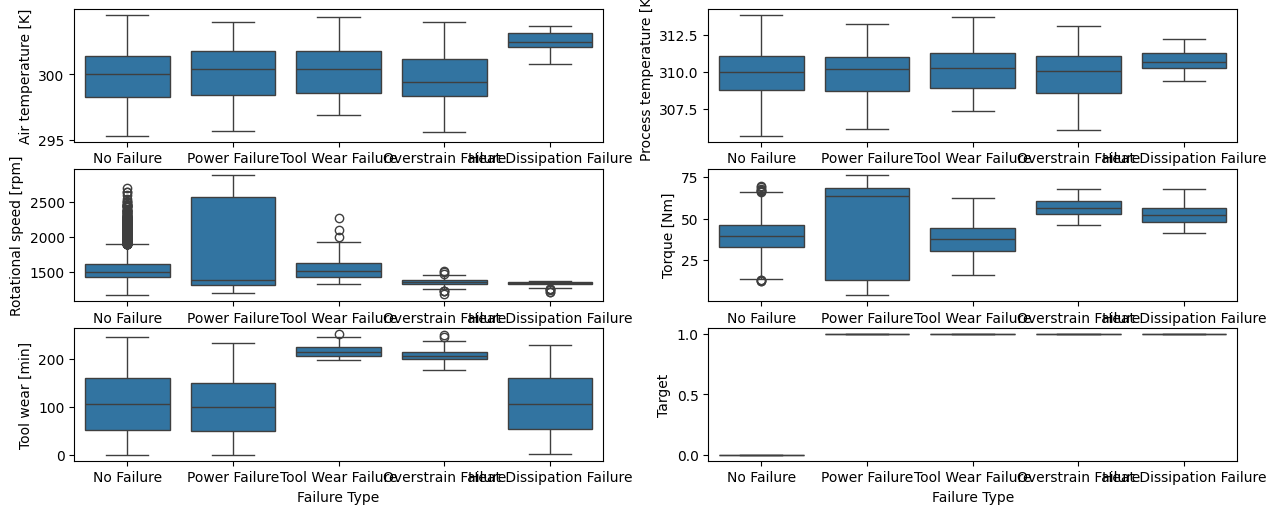

In [ ]:
plt.figure(figsize = (15 , 10))
for i , col in enumerate(num_col,1):
    plt.subplot(5,2,i)
    sns.boxplot(x=df['Failure Type'], y=df[col])

<Axes: >

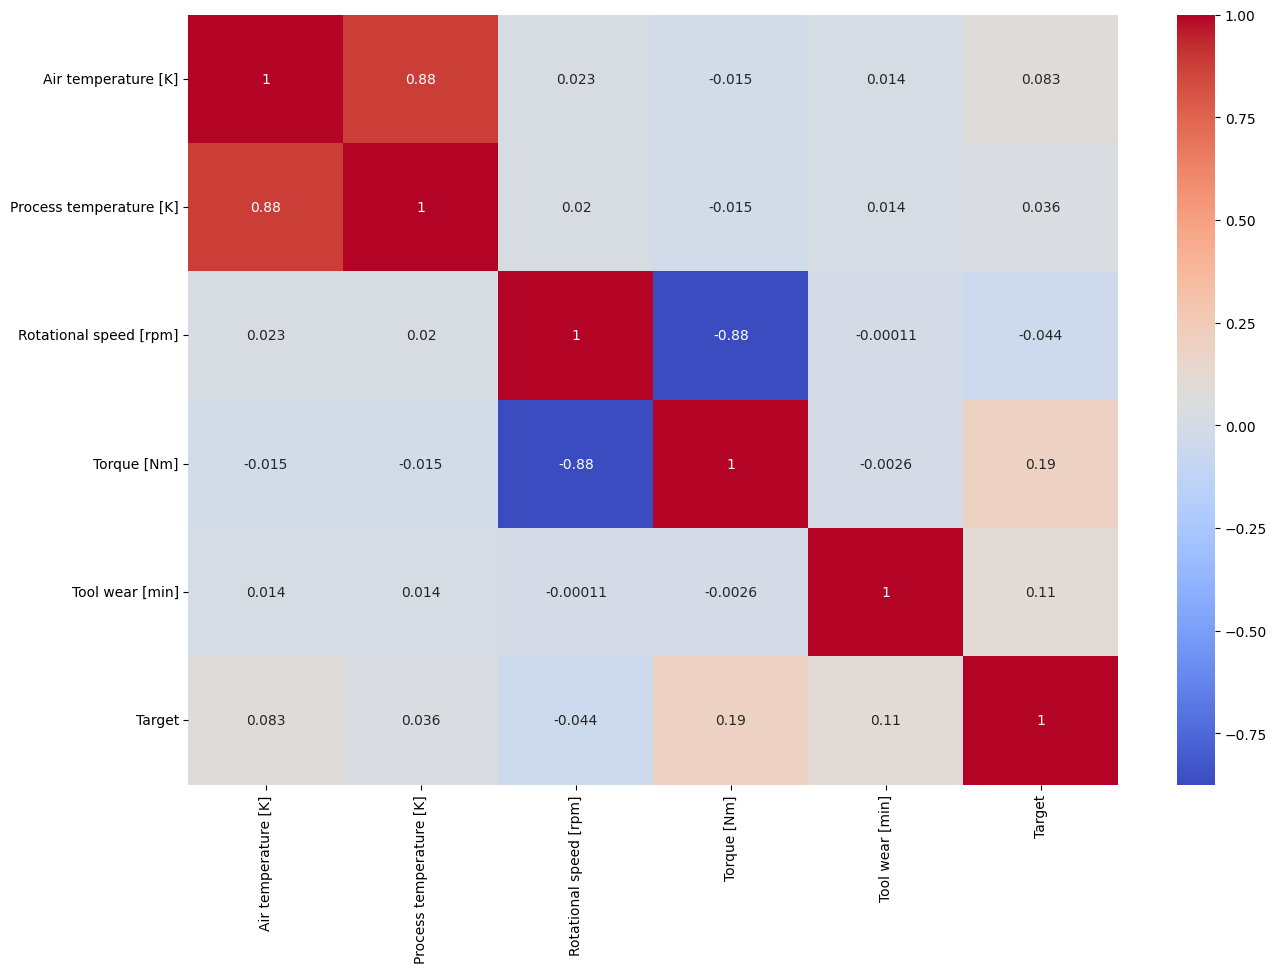

In [ ]:
plt.figure(figsize = (15 , 10))
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix , annot = True, cmap = 'coolwarm')

In [ ]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df['Type'].value_counts()

,count
Type,
L,5984
M,2991
H,998


In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
data_encode = ohe.fit_transform(df[['Type']])

df_encode = pd.DataFrame(data_encode, columns=ohe.get_feature_names_out(['Type']), index=df.index)
df_fix = pd.concat([df, df_encode], axis=1)
df_fix.drop('Type', axis=1, inplace=True)
df_fix.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Type_H,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,0.0,0.0,1.0
1,298.2,308.7,1408,46.3,3,0,No Failure,0.0,1.0,0.0
2,298.1,308.5,1498,49.4,5,0,No Failure,0.0,1.0,0.0
3,298.2,308.6,1433,39.5,7,0,No Failure,0.0,1.0,0.0
4,298.2,308.7,1408,40.0,9,0,No Failure,0.0,1.0,0.0


In [ ]:
df_fix.isna().sum()

,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0
Type_H,0
Type_L,0
Type_M,0


In [ ]:
df_fix.drop('Failure Type', axis=1, inplace=True)

X = df_fix.drop('Target', axis=1)
y = df_fix['Target']

In [ ]:
from sklearn.preprocessing import QuantileTransformer

scaler = QuantileTransformer()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train , y_train)
clf.score(X_test , y_test)

0.9709273182957393

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report

y_pred_lr = clf.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))

print("\nXGBoost:")
print(classification_report(y_test, y_pred_xgb))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1936
           1       1.00      0.02      0.03        59

    accuracy                           0.97      1995
   macro avg       0.99      0.51      0.51      1995
weighted avg       0.97      0.97      0.96      1995


XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1936
           1       0.81      0.75      0.78        59

    accuracy                           0.99      1995
   macro avg       0.90      0.87      0.89      1995
weighted avg       0.99      0.99      0.99      1995


Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1936
           1       0.90      0.59      0.71        59

    accuracy                           0.99      1995
   macro avg       0.94      0.80      0.85      1995
weighted avg       0.99    

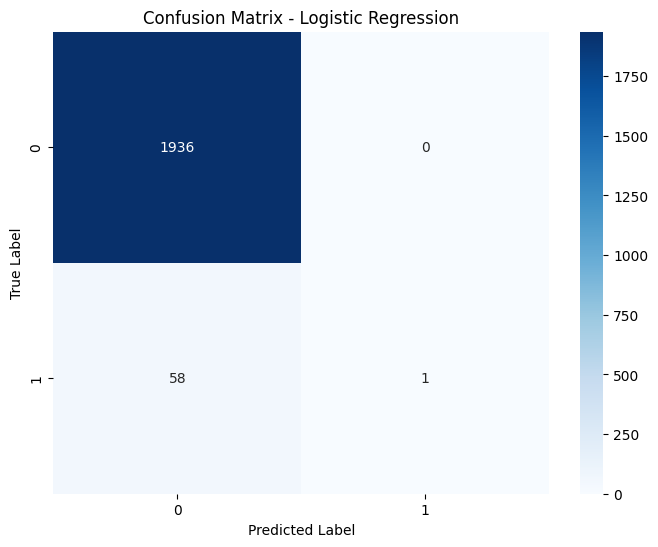

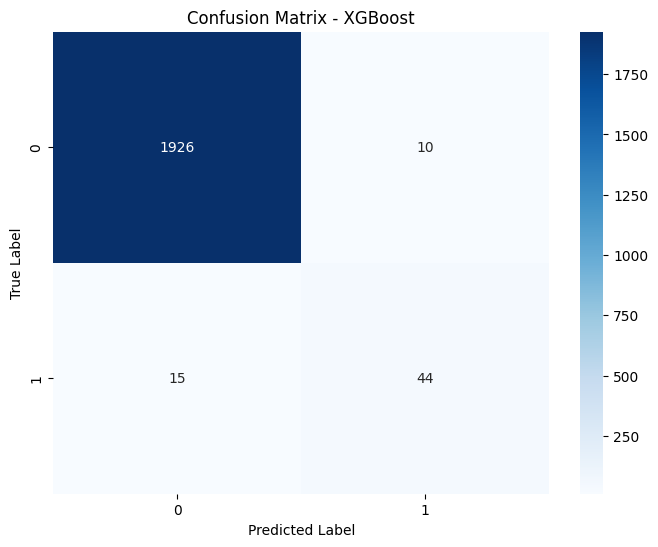

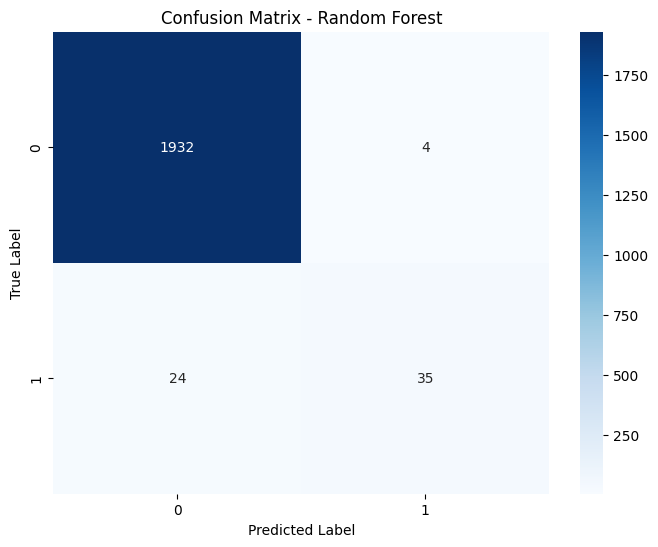

In [ ]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_rf = confusion_matrix(y_test, y_pred_rf)

def plot_confusion_matrix(cm, labels, title):
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
  plt.title(title)
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.show()


labels = df['Target'].unique()

plot_confusion_matrix(cm_lr, labels, "Confusion Matrix - Logistic Regression")
plot_confusion_matrix(cm_xgb, labels, "Confusion Matrix - XGBoost")
plot_confusion_matrix(cm_rf, labels, "Confusion Matrix - Random Forest")